## Random Forest Algorithm(Decision Tree)

    Random Forest is a Supervised Learning algorithm.
    
    - It has 2 mechanism (variation) :-
        1) Classification Problems,
        2) Regression Problems
      
    - It is one of the most flexible and easy to use algorithm.
    - It creates Decision Tree on the given data samples, gets prediction from each tree and select best situation by means
      of voting.
    - It is also a pretty good indicator of feature importance.
    - Random forest combines multiple Decision Tree resulting in a forest of trees hence the name Random Forest came into
      the picture.
    - The higher the number of trees in the forest, the more accurate is the result.

### Algorithm

    Random Forest Algorithm can be divided into 2 stages :-
    
    Stage A :-
    (1). In the first stage we randomly select "k" features out of total "n" features and build random forest where k < n,
    (2). Among the "k" features calculate the node "d" using the best split point,
    (3). Split the node "d" into daughter node using the best split,
    (4). Repeat the step until "l" number of nodes has beem reached,
    (5). Build forest by repeating step 1 to 4 for "x" number of time to create "x" number of tree.

### EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('car_evaluation.csv')

In [3]:
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
car_df.columns = ['buying','maintenance','doors','person','luggage','safety','class']

In [5]:
car_df

,buying,maintenance,doors,person,luggage,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
car_df.columns

Index(['buying', 'maintenance', 'doors', 'person', 'luggage', 'safety',
       'class'],
      dtype='object')

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1727 non-null   object
 1   maintenance  1727 non-null   object
 2   doors        1727 non-null   object
 3   person       1727 non-null   object
 4   luggage      1727 non-null   object
 5   safety       1727 non-null   object
 6   class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
car_df.describe()

,buying,maintenance,doors,person,luggage,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [9]:
for cols in car_df.columns.values.tolist():
    print(car_df[cols].value_counts())
    print("//===========================//\n")

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
//===========================//

high     432
med      432
low      432
vhigh    431
Name: maintenance, dtype: int64
//===========================//

3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
//===========================//

4       576
more    576
2       575
Name: person, dtype: int64
//===========================//

med      576
big      576
small    575
Name: luggage, dtype: int64
//===========================//

med     576
high    576
low     575
Name: safety, dtype: int64
//===========================//

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64
//===========================//



In [10]:
car_df.isnull().sum()

buying         0
maintenance    0
doors          0
person         0
luggage        0
safety         0
class          0
dtype: int64

### Inputs & Target Columns

In [11]:
X = car_df.drop(['class'], axis=1)

In [12]:
X

,buying,maintenance,doors,person,luggage,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [13]:
y = car_df['class']

In [14]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

### Training & Testing Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(1208, 6)

In [18]:
X_test.shape

(519, 6)

In [19]:
y_train.shape

(1208,)

In [20]:
y_test.shape

(519,)

### Encoding Categorical Data

In [21]:
X_train.head()

,buying,maintenance,doors,person,luggage,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [22]:
X_train.dtypes

buying         object
maintenance    object
doors          object
person         object
luggage        object
safety         object
dtype: object

In [23]:
import category_encoders as ce

In [24]:
encoder = ce.OrdinalEncoder()

In [25]:
X_train = encoder.fit_transform(X_train)

In [26]:
X_test = encoder.transform(X_test)

In [27]:
X_train

,buying,maintenance,doors,person,luggage,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3
...,...,...,...,...,...,...
1130,1,1,2,2,1,3
1294,1,4,1,2,1,1
860,2,4,1,2,1,3
1459,3,2,3,3,2,1


In [28]:
X_test

,buying,maintenance,doors,person,luggage,safety
599,2,2,3,3,1,3
932,1,3,3,1,1,3
628,2,2,1,3,1,1
1497,3,2,1,1,3,2
1262,1,4,3,2,3,3
...,...,...,...,...,...,...
490,2,3,3,3,3,1
1276,1,4,1,3,1,1
287,4,1,3,2,2,3
701,2,1,3,3,2,3


### Decision Tree Classifier Model

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [31]:
gini_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
y_test_pred = gini_model.predict(X_test)

In [33]:
y_test_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'acc',
       'acc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc', 'una

In [34]:
y_train_pred = gini_model.predict(X_train)

In [35]:
y_train_pred

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

### Accuracy Score

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
print('Testing Accuracy Score : {0:0.4f}'.format(accuracy_score(y_test, y_test_pred)))

Testing Accuracy Score : 0.8150


In [38]:
print('Traning Accuracy Score : {0:0.4f}'.format(accuracy_score(y_train, y_train_pred)))

Traning Accuracy Score : 0.8013


### Plotting Tree

In [39]:
from sklearn.tree import plot_tree

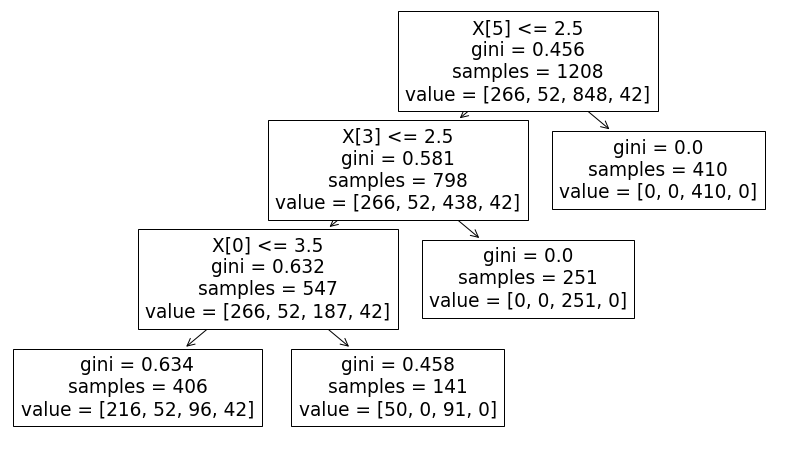

In [40]:
plt.figure(figsize=(14,8))
plot_tree(gini_model.fit(X_train, y_train))
plt.show()

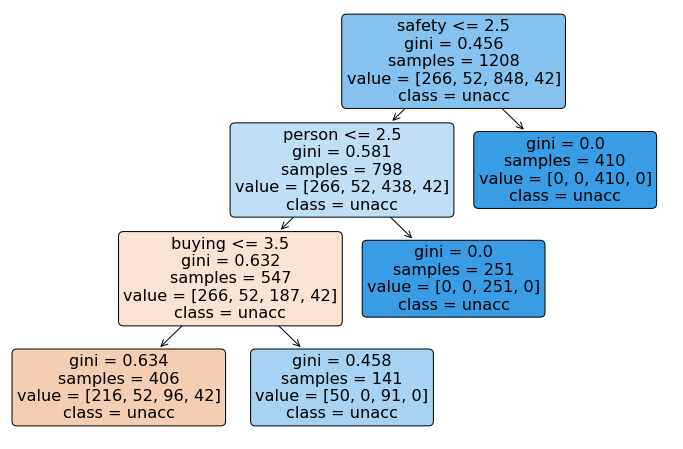

In [52]:
plt.figure(figsize=(12,8))
plot_tree(gini_model,
          feature_names=X_train.columns,
          class_names=y_train,
          filled=True,
          rounded=True
         )
plt.show()

In [57]:
#!pip install graph

In [58]:
#import graphviz

In [59]:
#from sklearn.tree import export_graphviz

In [60]:
# tree_data = export_graphviz(gini_model,
#                            out_file=None,
#                            feature_names=X_train.columns,
#                            class_names=y_train,
#                            filled=True,
#                            rounded=True,
#                            special_characters=True)

In [61]:
#graphviz.Source(tree_data)